In [ ]:
import numpy as np
import os
import random
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Flatten
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_path = 'train'
test_path = "test"


train_datagen=ImageDataGenerator(
    rescale=1./255,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    validation_split=0.1
)
val_datagen=ImageDataGenerator(rescale=1./255, validation_split=0.1)

test_datagen=ImageDataGenerator(rescale=1./255)


train_generator=train_datagen.flow_from_directory(
    train_path,
    target_size=(224,224),
    shuffle=True,
    class_mode='categorical',
    batch_size=128,
    subset='training'
)

val_generator=val_datagen.flow_from_directory(
    train_path,
    target_size=(224,224),
    shuffle=False,
    class_mode='categorical',
    batch_size=128,
    subset='validation'
)


test_generator=test_datagen.flow_from_directory(
    test_path,
    target_size=(224,224),
    shuffle=True,
    class_mode='categorical',
    batch_size=1
)

Found 4711 images belonging to 3 classes.
Found 521 images belonging to 3 classes.
Found 624 images belonging to 3 classes.


In [ ]:
from keras import layers
from keras.models import Sequential, Model
from keras.optimizers import Adam, RMSprop
from tensorflow.keras.applications import MobileNetV2
from keras.utils.np_utils import to_categorical
from keras.layers import  Conv2D,MaxPooling2D,Activation,Dropout,Flatten,Dense,BatchNormalization
import tensorflow as tf


mobile= MobileNetV2(weights='imagenet',include_top=False,input_shape=(224,224,3))

x=Flatten()(mobile.output)
x=Dense(128, activation='relu')(x)
output=Dense(3, activation='softmax')(x)
model = Model(inputs=mobile.input, outputs=output)
model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1_pad (ZeroPadding2D)       (None, 225, 225, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         Conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
_______________________________________________________________________________________

In [ ]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
history = model.fit(
    train_generator,
    steps_per_epoch = train_generator.samples//128,
    validation_data = val_generator,
    epochs = 10,
    validation_steps = val_generator.samples//128
)


Epoch 1/10
36/36 [==============================] - 1143s 32s/step - loss: 1.7971 - accuracy: 0.6594 - val_loss: 1.2698 - val_accuracy: 0.3770
Epoch 2/10
36/36 [==============================] - 1139s 32s/step - loss: 0.5366 - accuracy: 0.7626 - val_loss: 6.0623 - val_accuracy: 0.4941
Epoch 3/10
36/36 [==============================] - 1108s 31s/step - loss: 0.5025 - accuracy: 0.7818 - val_loss: 1.1002 - val_accuracy: 0.2441
Epoch 4/10
36/36 [==============================] - 1135s 32s/step - loss: 0.4660 - accuracy: 0.7881 - val_loss: 1.3241 - val_accuracy: 0.2715
Epoch 5/10
36/36 [==============================] - 938s 26s/step - loss: 0.4465 - accuracy: 0.8010 - val_loss: 4.5300 - val_accuracy: 0.3906
Epoch 6/10
36/36 [==============================] - 1058s 29s/step - loss: 0.4416 - accuracy: 0.8065 - val_loss: 3.9340 - val_accuracy: 0.2480
Epoch 7/10
36/36 [==============================] - 1142s 32s/step - loss: 0.4204 - accuracy: 0.8108 - val_loss: 2.3301 - val_accuracy: 0.5273


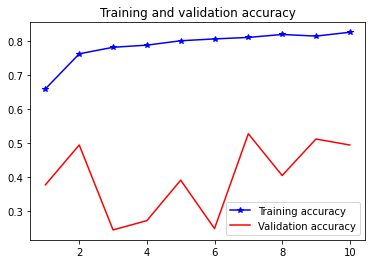

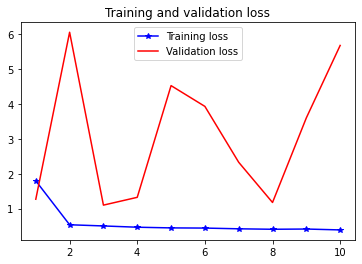

In [ ]:
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(train_acc) + 1)

plt.plot(epochs, train_acc, 'b*-', label = 'Training accuracy')
plt.plot(epochs, val_acc, 'r', label = 'Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, train_loss, 'b*-', label = 'Training loss')
plt.plot(epochs, val_loss, 'r', label = 'Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix
y_pred = model.predict_generator(generator=test_generator)
y_pred = np.argmax(y_pred, axis=1)
y_true = test_generator.classes
cm=confusion_matrix(y_true,y_pred)

print(cm)

Instructions for updating:
Please use Model.predict, which supports generators.
[[  1 233   0]
 [  0 242   0]
 [  0 147   1]]


In [ ]:
from sklearn.metrics import classification_report
y_pred = model.predict_generator(generator=test_generator)
y_pred = np.argmax(y_pred, axis=1)
y_true = test_generator.classes
target_names = ['class1', 'class 2', 'class 3']
print(classification_report(y_true, y_pred, target_names=target_names))

              precision    recall  f1-score   support

      class1       0.00      0.00      0.00       234
     class 2       0.39      1.00      0.56       242
     class 3       0.00      0.00      0.00       148

    accuracy                           0.39       624
   macro avg       0.13      0.33      0.19       624
weighted avg       0.15      0.39      0.22       624

